# About Data
The U.S. energy landscape relies on a mix of fossil fuels and renewables, each with unique environmental and economic impacts. As the nation works toward sustainability and energy security, understanding this energy mix is essential for informed policy and progress toward cleaner energy

Additionally, we will use a TIGER shapefile of the US states from the United States Census Bureau. TIGER stands for Topologically Integrated Geographic Encoding and Referencing. This used to be the data format the US Census distributed geospatial data, but since 2008 TIGER files are converted to shapefiles. You can view the metadata for all the TIGER shapefiles 

# Streamlining your code

We Will:
- Extract data from CSV to create a `geopandas.DataFrame`
- Do more customization for maps and matplotlib figures
- Go over strategies to streamline your code!

## Data Loading

In [1]:
import os

import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype

import geopandas as gpd
import matplotlib.pyplot as plt

# Display all columns when looking at dataframes
pd.set_option("display.max.columns", None) # This will not hide columns with 3 dots

In [2]:
# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)
# Simpify column names
power_plants.columns = power_plants.columns.str.lower()

# Drop first column
power_plants = power_plants.drop(columns='unnamed: 0')

power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


In [3]:
# Import states data
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
states = gpd.read_file(fp)

#simplify column names
states.columns = states.columns.str.lower()

states.head(3)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


## CSV to `GeoDataFrame`

The power platns file is a CSV. Unlike shapefiles, `geopandas` doesn't have a way to extract a geometry column from CSV. So we need to specify this manually.

We will use the longitude and latitude columns in the CSV, these indicate the location of the power plants in NAD83 CRS ( EPSG:4259)


In [4]:
# Create points from latitude and longitude

points = gpd.points_from_xy(power_plants.longitude,
                   power_plants.latitude)

# Create a Geodataframe


In [5]:
power_plants = gpd.GeoDataFrame(power_plants, # Data
                 geometry = points, # SPecify Geometry column
                 crs = 'EPSG:4269' # Specify CRS
                 )

<Axes: >

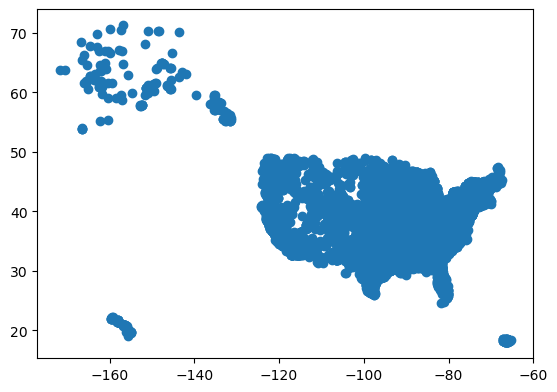

In [6]:
power_plants.plot()

## F-strings

We have printed variables using string concatenation inside `print()` function writing commas between every string and variable we want to print.
EX;

In [7]:
print('CRS:', power_plants.crs)

CRS: EPSG:4269


f-strings = formatted string, The simplest syntax for and f-string is:

``` default
f" some text {replace}"
```

`replace` can be a variable, an expression, a function or a method call.

In [8]:
# Explore CRS

print(f"ellipsoid: {power_plants.crs.ellipsoid}")
print(f"datum: {power_plants.crs.datum}")

ellipsoid: GRS 1980
datum: North American Datum 1983


In [9]:
print(f"{'Is the CRS geographic?' : <25} {power_plants.crs.is_geographic}")
print(f"{'Is the CRS projected?' : <25} {power_plants.crs.is_projected}")

Is the CRS geographic?    True
Is the CRS projected?     False


## Explore TIGER Shapefile

Preliminary information about the state geodataframe

In [10]:
states.tail()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
51,1,1,25,00606926,25,MA,Massachusetts,00,G4000,A,20204341720,7130708927,+42.1565196,-071.4895915,"POLYGON ((-71.25515 42.73655, -71.25510 42.736..."
52,3,5,51,01779803,51,VA,Virginia,00,G4000,A,102258178227,8528072639,+37.5222512,-078.6681938,"POLYGON ((-76.49150 36.55065, -76.49388 36.550..."
53,3,5,11,01702382,11,DC,District of Columbia,00,G4000,A,158316184,18709787,+38.9042474,-077.0165167,"POLYGON ((-77.11975 38.93435, -77.11886 38.935..."
54,2,4,19,01779785,19,IA,Iowa,00,G4000,A,144659596400,1086089872,+42.0700243,-093.4933473,"POLYGON ((-95.86095 43.50004, -95.85979 43.500..."
55,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294365853885,853990728,+34.2039362,-111.6063449,"POLYGON ((-110.75069 37.00301, -110.74193 37.0..."


EPSG:4269


<Axes: >

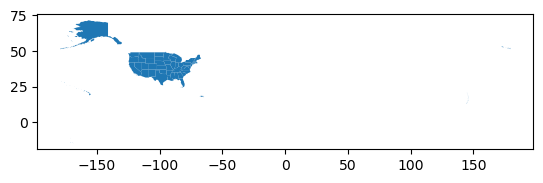

In [11]:
print(states.crs)
states.plot()

## `for`-loops
It can be easier to work with the codes as numbers instead of strings, so let’s update the corresponding columns in the states geo-dataframe. We start by checking the data type of the `region`, `division`, and `statefp` columns:

In [12]:
# Examine if the region, division, statefp columns are string or numeric
print(f"region is string dtype? {is_string_dtype(states['region'])}")
print(f"division is string dtype? {is_string_dtype(states['division'])}")
print(f"statefp is string dtype? {is_string_dtype(states['statefp'])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


This is inconvenient because it repeats the same piece of code, only changing the column name.

Instead, we can use a for loop to streamline:

In [13]:
code_cols = ['region','division', 'statefp']

# Check whether codes columns are strings
for column in code_cols:
    print(f"{column} is string dtype? {is_string_dtype(states[column])}")

region is string dtype? True
division is string dtype? True
statefp is string dtype? True


** DRY code**

DRY = Don't repeat yourself = core programming principle that encourages reducing redundancy and consolidating repeated logic. If you need to repeat the "same" code more than twice, you probably need a for loop.

## `assert`
the `assert` keyword does nothing if the expression next to it evaluates to `True` and it raises an `AssertionError` exception and stopes your code from runnning further if not. 

We use it to integrate tests into our code.
EX:


In [14]:
# Does nothing if statement is True
assert 2+2 == 4

# Raise an error if statement is False
assert 2+2 == 3


AssertionError: 

A workflow for updating the data type of code columns to be integers:

for each `column` in `code_columns`:
- *convert column to numeric*
- **check if column is numeric using `assert`**

In [15]:
# Update code columns into integers
for column in code_cols:
    states[column] = states[column].astype('int')
    assert is_numeric_dtype(states[column])
    print(f"{column} is numeric dtype? {is_numeric_dtype(states[column])}")

region is numeric dtype? True
division is numeric dtype? True
statefp is numeric dtype? True


In [16]:
states.dtypes

region         int64
division       int64
statefp        int64
statens       object
geoid         object
stusps        object
name          object
lsad          object
mtfcc         object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

## Data Selection

For this lesson, we want to use only data for the contiguous states. The data covers a bigger extension:

<Axes: >

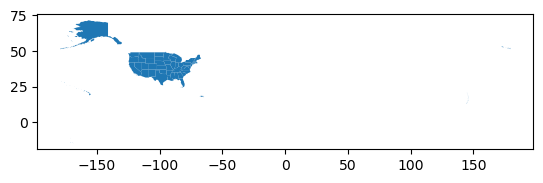

In [17]:
states.plot()

## Check-In

1. What are the unique values for region, division, state codes in the data?

2. Which codes should only keep states in the contiguous US?

Hint : 
```
 states[~ states.statefp.isin([2,15])]
```

In [18]:
# 1.
states.head(2)
print(states['region'].unique())
print(states['division'].unique())
print(states['statefp'].unique())


[3 2 1 4 9]
[5 3 4 1 8 9 2 7 6 0]
[54 12 17 27 24 44 16 33 37 50  9 10 35  6 34 55 41 31 42 53 22 13  1 49
 39 48  8 45 40 47 56 15 38 21 78 69 66 23 36 32  2 60 26  5 28 29 30 20
 18 72 46 25 51 11 19  4]


<Axes: >

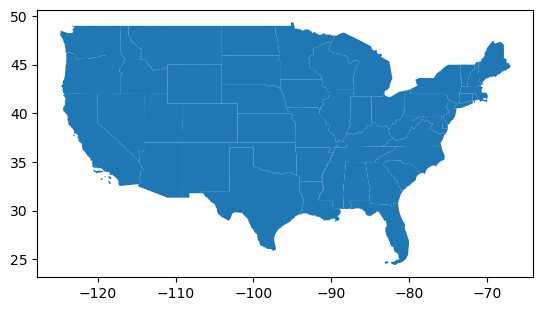

In [19]:
#2. Remove region 9 or division 0
# Hawaii and Alaska codes 2 and 15

# Select contiguous US states
contiguous = states[(states.region != 9) & (~ states.statefp.isin([2,15]))]
contiguous.plot()



### The `~` tilde symbol is used in Python to negate a statement

## Check-in:

Select the data in the `power_plants` data frame for the contiguous US states

In [20]:
power_plants.head()
power_plants.state.unique()

array(['Alaska', 'Alabama', 'Texas', 'Minnesota', 'California',
       'Kentucky', 'Nebraska', 'New York', 'Washington', 'Arizona',
       'Kansas', 'South Carolina', 'Florida', 'Nevada', 'Utah',
       'Oklahoma', 'Arkansas', 'Illinois', 'Colorado', 'Wyoming',
       'Connecticut', 'Massachusetts', 'New Mexico', 'Vermont',
       'Delaware', 'Maryland', 'Georgia', 'Missouri', 'Hawaii', 'Idaho',
       'Maine', 'Indiana', 'North Carolina', 'Iowa', 'Louisiana',
       'Michigan', 'Wisconsin', 'Mississippi', 'Montana', 'New Hampshire',
       'New Jersey', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Dakota', 'Tennessee', 'Virginia',
       'West Virginia', nan, '994.4', 'District of Columbia',
       'Puerto Rico'], dtype=object)

<Axes: >

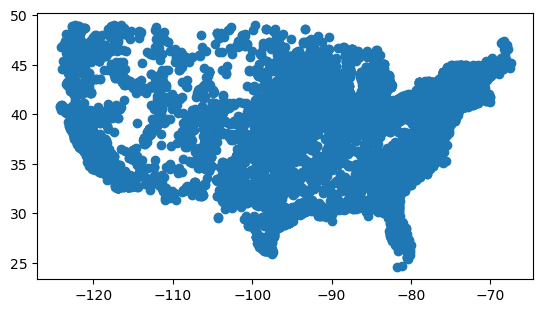

In [21]:
power_plants = power_plants[(~ power_plants.state.isin(['Alaska','Hawaii','Puerto Rico']))]
power_plants.plot()

## Plotting

Before plotting data we need to make sure they are in the same CRS

In [22]:
contiguous.crs == power_plants.crs

True

<Axes: title={'center': 'Operable electric generating plants in the contiguous US'}>

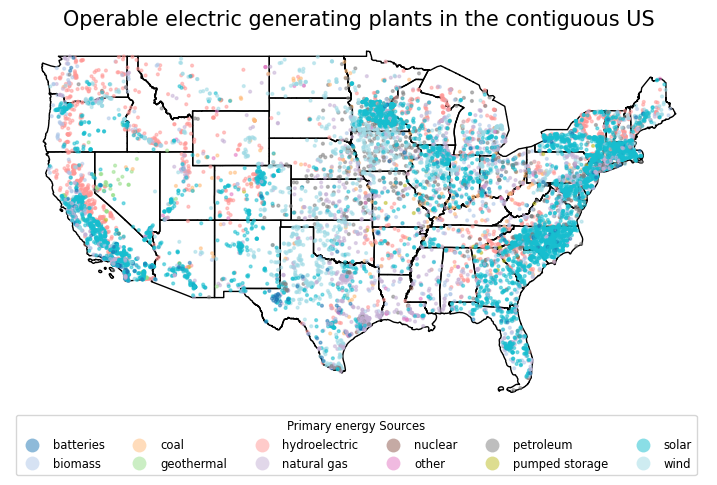

In [23]:
fig, ax = plt.subplots(figsize=(9,5)) # Update figure size

# Remove the axis for a cleaner map
ax.axis("off")

# Title
ax.set_title('Operable electric generating plants in the contiguous US',
             fontsize = 15)

# Add states
contiguous.plot(ax=ax,
                color = 'none')

# Add power plants colored by energy source
power_plants.plot(ax=ax,
                  # color we want for points
                  column = 'primsource',
                  legend = True,
                  markersize= 4,
                  # type of point
                  cmap = 'tab20',
                  # transparency
                  alpha = 0.5,
                  # Dictionary- Key Values
                  legend_kwds={
                      'title' :'Primary energy Sources',
                      'title_fontsize': 'small',
                      'fontsize': 'small',
                      'loc':'upper left',
                      'bbox_to_anchor': (0,0),
                      'ncol': 6
                  })

## `for` with `zip`

Often we need to iterate simultaneously over two lists (or iterables).

` zip()` is a Python function that allows you to combine two list so that you can interate over their elements in pairs. When used in a `loop` it allows you to process elements of each list togther.

EX:

In [24]:
# Iterate over a single list
numbers = [1,2,3]

for num in numbers:
    print(num+1)

2
3
4


In [25]:
# Iterate over two list in pairs using zip()

letters = ['a', 'b', 'c']

for num, letter in zip(numbers,letters):
    print(num+1, letter)

2 a
3 b
4 c


A common situation when code gets repeated is when creating subplots

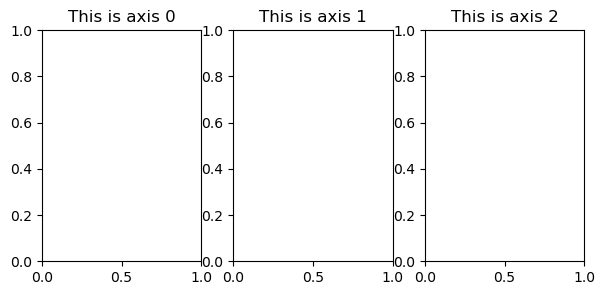

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols =3, figsize =(7,3))

axes[0].set_title('This is axis 0')
axes[1].set_title('This is axis 1')
axes[2].set_title('This is axis 2')

plt.show()

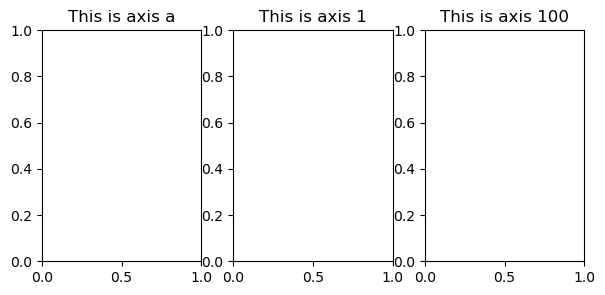

In [27]:
# Use `zip()` to create subplots and avoid redundency

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(7,3))

for ax, i in zip(axes, ['a',1,100]):
    ax.set_title(f'This is axis {i}')

plt.show()

## Check-in

In [28]:
power_plants.tail(2)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
12007,23576,66729,(3K) 59 Hetcheltown Rd,64872,"Distributed Solar Development, LLC",IPP Non-CHP,NaN,NaN,NaN,New York,NaN,solar,Solar = 1.4 MW,Solar Photovoltaic,1.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-73.91048,42.87657,POINT (-73.91048 42.87657)
12008,23577,66730,Jordan Energy-DFA Middlebury Center Plan,64872,"Distributed Solar Development, LLC",IPP Non-CHP,NaN,NaN,NaN,Pennsylvania,NaN,solar,Solar = 1.1 MW,Solar Photovoltaic,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-77.27590,41.83800,POINT (-77.27590 41.83800)


In [29]:
# Select the power plants in CA in a variable named ca_power_plants

ca_power_plants = power_plants[power_plants['state'] == "California"]
ca_power_plants.head()

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
19,11589,34,Rollins,13402,Nevada Irrigation District,IPP Non-CHP,15531 Arrow Head Lane,Colfax,Placer,California,95713.0,hydroelectric,Hydroelectric = 12.1 MW,Conventional Hydroelectric,12.1,12.1,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.953341,39.134259,POINT (-120.95334 39.13426)
38,11608,72,Venice Hydro,12397,Metropolitan Water District of S CA,Electric Utility,3815 Sepulveda Blvd,Culver City,Los Angeles,California,90230.0,hydroelectric,Hydroelectric = 10.1 MW,Conventional Hydroelectric,10.1,10.1,NaN,NaN,NaN,NaN,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-118.416800,34.011350,POINT (-118.41680 34.01135)
54,11624,104,J S Eastwood,17609,Southern California Edison Co,Electric Utility,Hwy 168 Sierra National Forest,Shaver Lake,Fresno,California,93664.0,pumped storage,Pumped Storage = 199.8 MW,Hydroelectric Pumped Storage,199.8,199.8,NaN,NaN,NaN,NaN,NaN,199.8,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-119.256700,37.147926,POINT (-119.25670 37.14793)
74,11644,151,McClure,12745,Modesto Irrigation District,Electric Utility,639 S. McClure Rd.,Modesto,Stanislaus,California,95354.0,natural gas,"Natural Gas = 53.5 MW, Petroleum = 53.5 MW",Natural Gas Fired Combustion Turbine; Petroleu...,142.4,107.0,NaN,NaN,NaN,NaN,NaN,NaN,53.5,NaN,53.5,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.931390,37.629360,POINT (-120.93139 37.62936)
80,11650,161,Turlock Lake,19281,Turlock Irrigation District,Electric Utility,21642 Davis Road,Hickman,Stanislaus,California,95323.0,hydroelectric,Hydroelectric = 3.3 MW,Conventional Hydroelectric,3.3,3.3,NaN,NaN,NaN,NaN,3.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-120.594678,37.611461,POINT (-120.59468 37.61146)


In [30]:
# Create a list named top_sources with California's top 3 electricity primary sources
ca_power_plants['primsource'].value_counts()

#top_sources= ca_power_plants[ca_power_plants.groupby['primsource'] == ['solar','natura gas', ' hydroelectric']]
top_sources =  ca_power_plants['primsource'].isin(['solar','natural gas','hydroelectric'])
top_sources


# Make list of Top_sources
top_sources = ['solar','natural gas','hydroelectric']

In [31]:
ca_boundary = states[states['name'] == 'California']
ca_boundary

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
13,4,9,6,01779778,06,CA,California,00,G4000,A,403673617862,20291712025,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.99987 41.18397, -119.9998..."


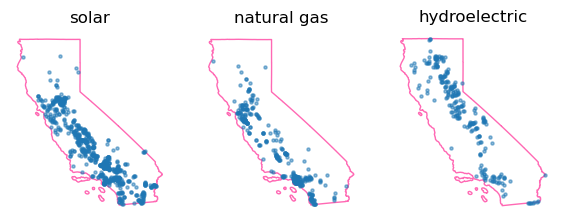

In [32]:
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize =(7,3))

for ax, i in zip(ax, top_sources):

    ax.set_title(i)

    ax.axis('off')

    ca_boundary.plot(ax=ax,
                     color = 'none',
                     edgecolor = 'hotpink')
    
    ca_power_plants[ca_power_plants['primsource'] == i].plot(ax=ax,
                                                               markersize = 5,
                                                               alpha = 0.5)
plt.show()

Exercise # 2 

In [36]:
def top3_states(power_source, power_plants):
    power_plants_source = power_plants_source[power_plants_source['primsource'] == power_source]
    top_states = power_plants_source['state'].value_counts().index[:3].tolist()
    return top_states

In [40]:
power_source_plants = power_plants[power_plants['primsource'] == 'wind']
power_source_plants

power_source_plants_state = power_source_plants[power_source_plants['state'] == 'Texas']
power_source_plants_state.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
3491,15061,54979,Big Spring Wind Power Facility,2770,Terra-Gen Operating Co-Wind,IPP Non-CHP,3300 South Moss Lake Rd,Big Spring,Howard,Texas,79720.0,wind,Wind = 34.3 MW,Onshore Wind Turbine,34.3,34.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-101.388333,32.2075,POINT (-101.38833 32.20750)
3811,15380,55579,Llano Estacado Wind Ranch,62136,Llano Estacado Wind Ranch,IPP Non-CHP,Unnammed road,White Deer,Carson,Texas,79097.0,wind,Wind = 80 MW,Onshore Wind Turbine,80.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-101.253300,35.4677,POINT (-101.25330 35.46770)
3812,15381,55581,King Mountain Wind Ranch 1,6354,FPL Energy Upton Wind LP,IPP Non-CHP,120 E. 5th Street,McCamey,Upton,Texas,79752.0,wind,Wind = 278 MW,Onshore Wind Turbine,278.0,278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,278.0,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-102.241700,31.2092,POINT (-102.24170 31.20920)


In [43]:
def plot_top3_states(power_source, power_plants, states):

    fig, ax = plt.subplots(figsize(12,6), nrows = 1, ncols = 3)

    for axis, state in zip(ax, top_states):
        axis.set_title(state)
        axis.axis('off')

        # Extract the state boundary and plot
        state_boundary = states[states['name'] == state]
        state_boundary.plot(ax = axis,
                            color = 'none')
        
        #Subset power plant info by power source
        power_source_plants = power_plants[power_plants['primsource'] == power_source]
        # states
        power_source_plants_state = power_source_plants[power_source_plants['state'] == state]

        # Plot power plant info
        power_source_plants_state.plot(ax=axis,
                                    markersize = 5,
                                    alpha = 0.5)
        
        plt.subtitle(f"Top 3 U.S. states by number of {power_source} - powered electric plants")

        plt.show()
